In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date
from pylab import rcParams
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
rcParams['figure.figsize'] = 20, 10

In [3]:
data1=pd.read_csv('/content/ADDYY.csv') #ADIDAS
data2=pd.read_csv('/content/AAPL.csv')  #APPLE
data3=pd.read_csv('/content/TM.csv')    #TOYOTA MOTORS

In [4]:
data1.loc[:, 'Date'] = pd.to_datetime(data1['Date'],format='%Y-%m-%d')
data1['Month'] = data1['Date'].dt.month
data1.sort_values(by='Date', inplace=True, ascending=True)
data1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month
0,2011-06-13,35.889999,36.230000,35.869999,35.869999,31.387390,7000,6
1,2011-06-14,36.599998,36.700001,36.410000,36.509998,31.947405,11000,6
2,2011-06-15,36.360001,36.570000,35.849998,36.200001,31.676157,51000,6
3,2011-06-16,35.470001,35.570000,35.209999,35.360001,30.941120,20400,6
4,2011-06-17,36.500000,36.700001,36.299999,36.500000,31.938662,16800,6


In [5]:
data2.loc[:, 'Date'] = pd.to_datetime(data2['Date'],format='%Y-%m-%d')
data2['Month'] = data2['Date'].dt.month
data2.sort_values(by='Date', inplace=True, ascending=True)
data2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month
0,2011-06-13,11.685714,11.725357,11.609643,11.664286,10.030155,329473200,6
1,2011-06-14,11.785714,11.901786,11.761071,11.872857,10.209505,334569200,6
2,2011-06-15,11.776786,11.796429,11.602857,11.669643,10.034760,399196000,6
3,2011-06-16,11.675000,11.738571,11.368929,11.612857,9.985929,510591200,6
4,2011-06-17,11.749643,11.758929,11.405714,11.437857,9.835445,615020000,6


In [6]:
data3.loc[:, 'Date'] = pd.to_datetime(data3['Date'],format='%Y-%m-%d')
data3['Month'] = data3['Date'].dt.month
data3.sort_values(by='Date', inplace=True, ascending=True)
data3.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month
0,2011-06-13,80.209999,80.260002,79.400002,79.720001,69.560913,836200,6
1,2011-06-14,80.080002,80.660004,80.040001,80.440002,70.189163,464200,6
2,2011-06-15,79.910004,80.330002,79.279999,79.480003,69.351509,550600,6
3,2011-06-16,79.239998,79.750000,79.029999,79.470001,69.342773,580200,6
4,2011-06-17,79.610001,79.900002,79.370003,79.510002,69.377678,375000,6


# ADIDAS

FOR ADIDAS
Shape of Training data = (2014, 2)
Shape of Test Data = (503, 2)


Text(0, 0.5, 'Adj Closing Price')

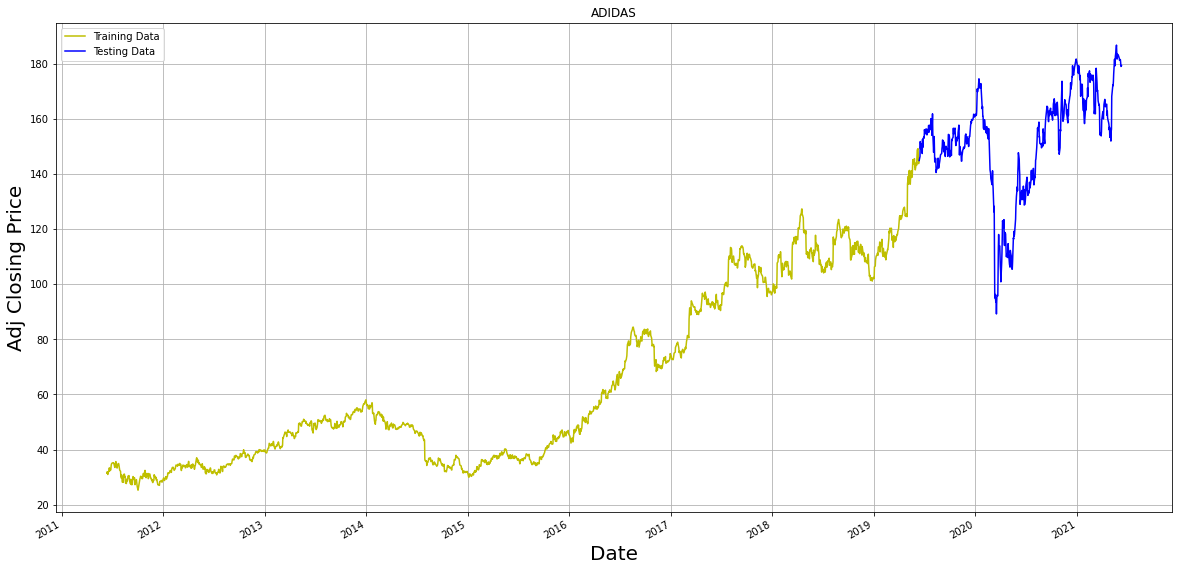

In [7]:
num_test = int(0.2*len(data1))
num_train = len(data1)  - num_test
data_train = data1[:num_train][['Date', 'Adj Close']]
data_test = data1[num_train:][['Date', 'Adj Close']]
print("FOR ADIDAS")
print("Shape of Training data = " + str(data_train.shape))
print("Shape of Test Data = " + str(data_test.shape))
plot = data_train.plot(x='Date', y='Adj Close', style='y-', grid=True,title="ADIDAS")
plot = data_test.plot(x='Date', y='Adj Close', style='b-', grid=True, ax=plot)
plot.legend(['Training Data', 'Testing Data'])
plot.set_xlabel("Date",fontsize=20)
plot.set_ylabel("Adj Closing Price",fontsize=20)

In [8]:
model = XGBRegressor(max_depth= 5,n_estimators= 1000,seed=50,gamma= 0.08,learning_rate= 0.04)
scaler = StandardScaler()
data_train_scaled=scaler.fit_transform(np.array(data_train['Adj Close']).reshape(-1,1))
x_train = []
y_train=[]
for i in range(3, len(data_train_scaled)):
      x_train.append(data_train_scaled[i-3:i,0])
      y_train.append(data_train_scaled[i,0])
x_train = np.array(x_train)
y_train = np.array(y_train)
 
model.fit(x_train,y_train)

[10:26:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.08,
             importance_type='gain', learning_rate=0.04, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=50,
             silent=None, subsample=1, verbosity=1)

R2 SCORE IS
0.9791892849008597


Text(0, 0.5, 'ADJ CLOSING PRICE')

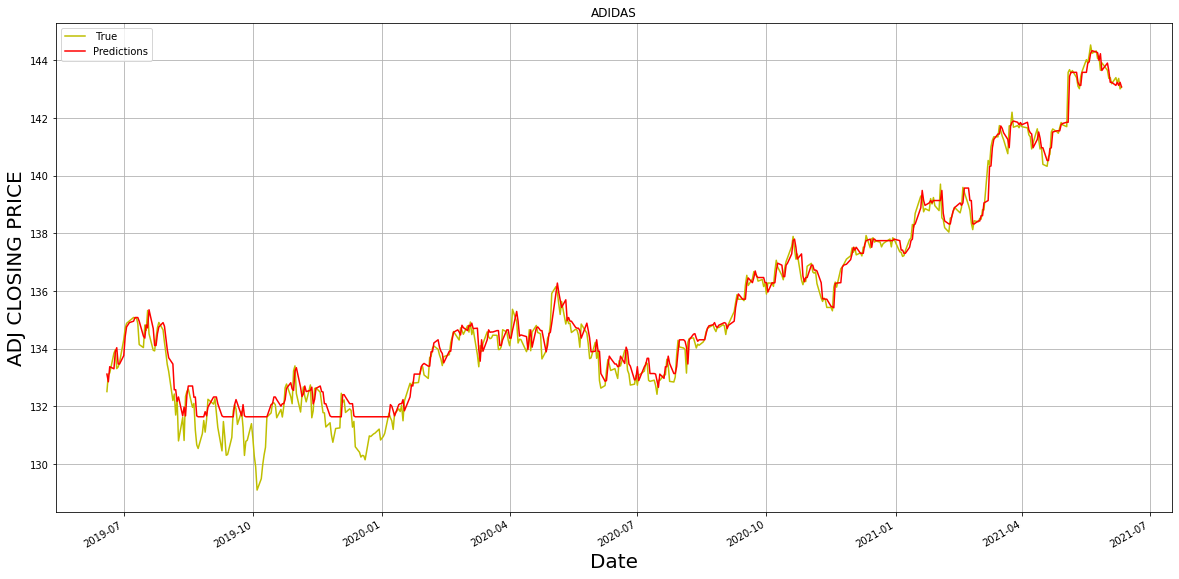

In [9]:
scaler_final=StandardScaler()
data_test_scaled=scaler_final.fit_transform(np.array(data_test['Adj Close']).reshape(-1,1))
x_test = []

for i in range(3, len(data_test_scaled)):
      x_test.append(data_train_scaled[i-3:i,0])
x_test = np.array(x_test)

y_true=[]
for i in range(3, len(data_test_scaled)):
  y_true.append(data_train_scaled[i,0])
y_true=np.array(y_true) 


y_predict=model.predict(x_test)
y_pr=scaler_final.inverse_transform(y_predict)
y_true=scaler_final.inverse_transform(y_true)
print("R2 SCORE IS")
print(r2_score(y_pr,y_true))
xv=data_test['Date']
outputdf=pd.DataFrame({'output': y_pr.reshape(-1), 'true_y': y_true.reshape(-1),'Date': xv[3:]})
p = outputdf.plot(x='Date', y='true_y', style='y-', grid=True,title="ADIDAS")
p = outputdf.plot(x='Date', y='output', style='r-', grid=True, ax=p)
p.legend([ ' True', 'Predictions'])
p.set_xlabel("Date",fontsize=20)
p.set_ylabel("ADJ CLOSING PRICE",fontsize=20)

# APPLE

FOR APPLE
Shape of Training data = (2014, 2)
Shape of Test Data = (503, 2)


Text(0, 0.5, 'Adj Closing Price')

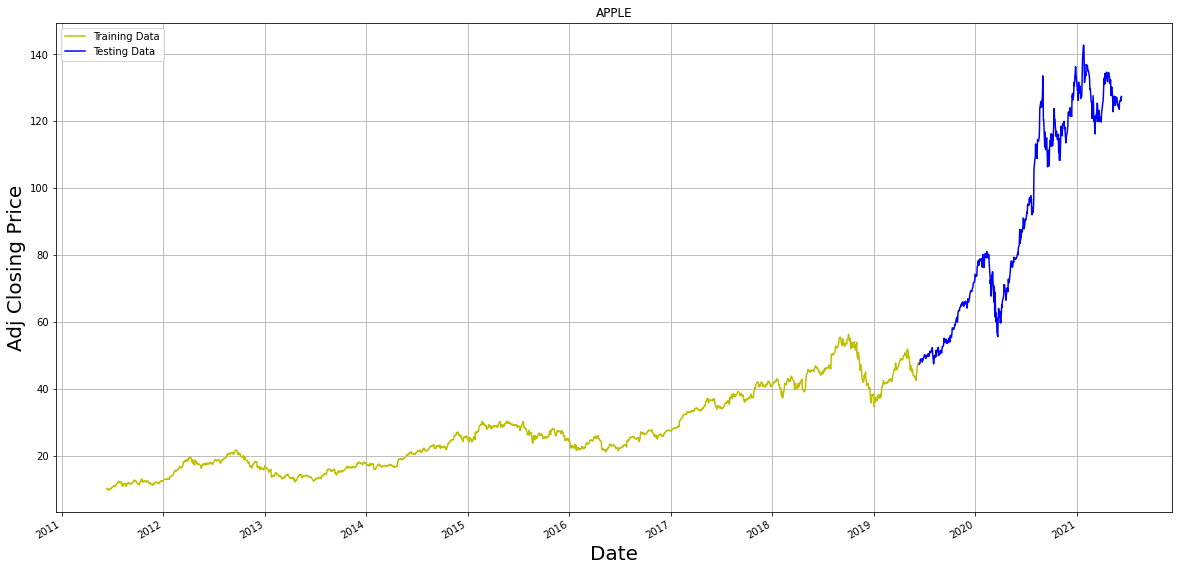

In [10]:
num_test = int(0.2*len(data2))
num_train = len(data2)  - num_test
data_train = data2[:num_train][['Date', 'Adj Close']]
data_test = data2[num_train:][['Date', 'Adj Close']]
print("FOR APPLE")
print("Shape of Training data = " + str(data_train.shape))
print("Shape of Test Data = " + str(data_test.shape))
plot = data_train.plot(x='Date', y='Adj Close', style='y-', grid=True,title="APPLE")
plot = data_test.plot(x='Date', y='Adj Close', style='b-', grid=True, ax=plot)
plot.legend(['Training Data', 'Testing Data'])
plot.set_xlabel("Date",fontsize=20)
plot.set_ylabel("Adj Closing Price",fontsize=20)

In [11]:
model = XGBRegressor(max_depth= 5,n_estimators= 1000,seed=50,gamma= 0.08,learning_rate= 0.04)
scaler = StandardScaler()
data_train_scaled=scaler.fit_transform(np.array(data_train['Adj Close']).reshape(-1,1))
x_train = []
y_train=[]
for i in range(3, len(data_train_scaled)):
      x_train.append(data_train_scaled[i-3:i,0])
      y_train.append(data_train_scaled[i,0])
x_train = np.array(x_train)
y_train = np.array(y_train)
 
model.fit(x_train,y_train)

[10:26:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.08,
             importance_type='gain', learning_rate=0.04, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=50,
             silent=None, subsample=1, verbosity=1)

R2 SCORE IS
0.9877979474974683


Text(0, 0.5, 'ADJ CLOSING PRICE')

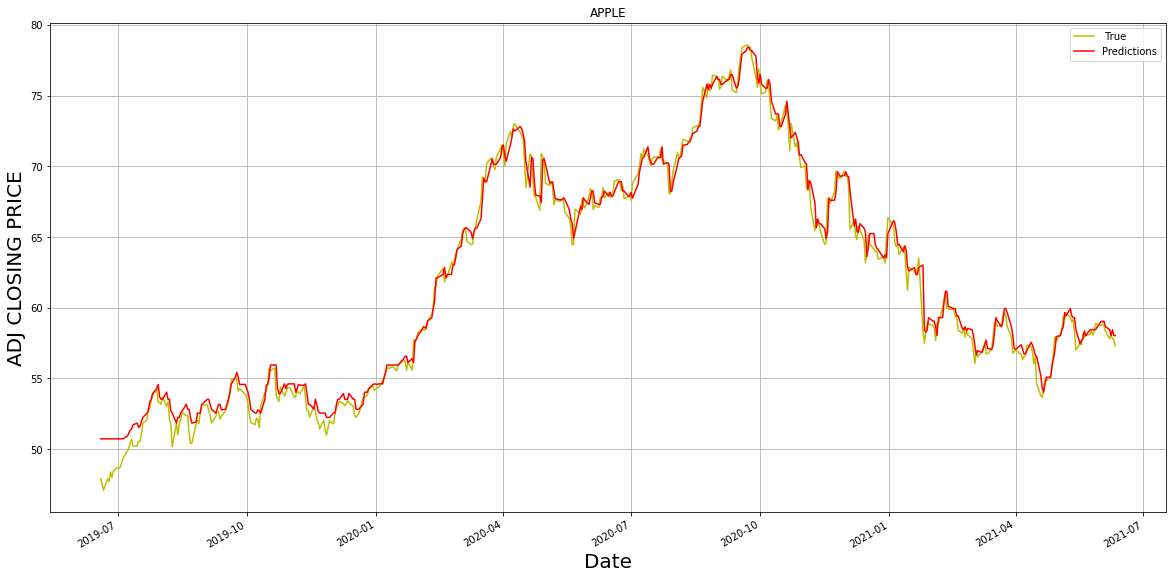

In [12]:
scaler_final=StandardScaler()
data_test_scaled=scaler_final.fit_transform(np.array(data_test['Adj Close']).reshape(-1,1))
x_test = []

for i in range(3, len(data_test_scaled)):
      x_test.append(data_train_scaled[i-3:i,0])
x_test = np.array(x_test)

y_true=[]
for i in range(3, len(data_test_scaled)):
  y_true.append(data_train_scaled[i,0])
y_true=np.array(y_true) 


y_predict=model.predict(x_test)
y_pr=scaler_final.inverse_transform(y_predict)
y_true=scaler_final.inverse_transform(y_true)
print("R2 SCORE IS")
print(r2_score(y_pr,y_true))
xv=data_test['Date']
outputdf=pd.DataFrame({'output': y_pr.reshape(-1), 'true_y': y_true.reshape(-1),'Date': xv[3:]})
p = outputdf.plot(x='Date', y='true_y', style='y-', grid=True,title="APPLE")
p = outputdf.plot(x='Date', y='output', style='r-', grid=True, ax=p)
p.legend([ ' True', 'Predictions'])
p.set_xlabel("Date",fontsize=20)
p.set_ylabel("ADJ CLOSING PRICE",fontsize=20)

# TOYOTA MOTORS

FOR TOYOTA MOTORS
Shape of Training data = (2014, 2)
Shape of Test Data = (503, 2)


Text(0, 0.5, 'Adj Closing Price')

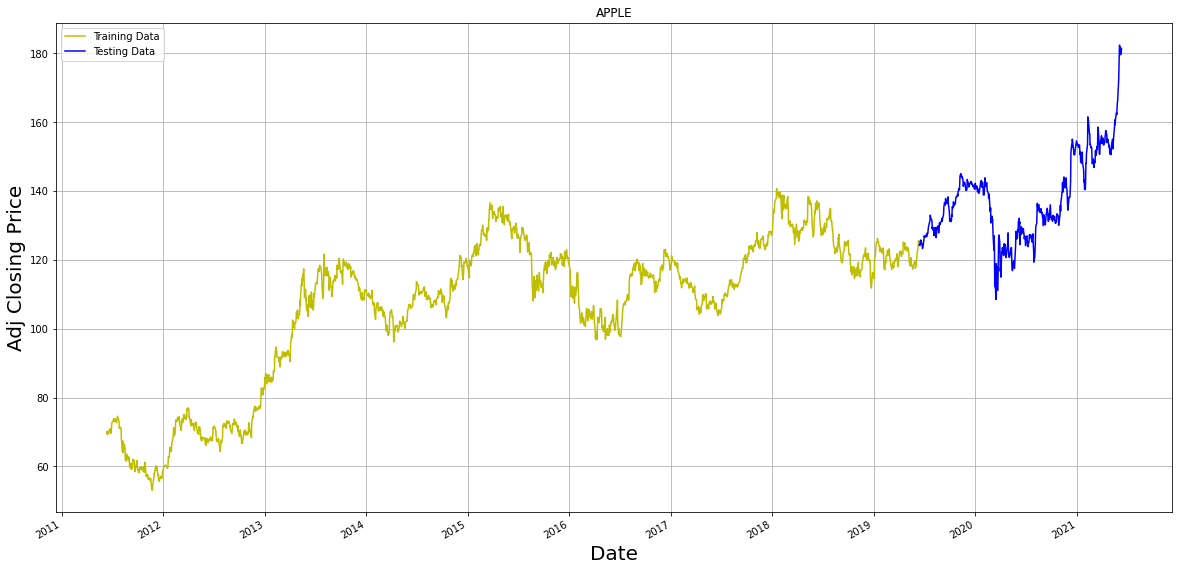

In [13]:
num_test = int(0.2*len(data3))
num_train = len(data3)  - num_test
data_train = data3[:num_train][['Date', 'Adj Close']]
data_test = data3[num_train:][['Date', 'Adj Close']]
print("FOR TOYOTA MOTORS")
print("Shape of Training data = " + str(data_train.shape))
print("Shape of Test Data = " + str(data_test.shape))
plot = data_train.plot(x='Date', y='Adj Close', style='y-', grid=True,title="APPLE")
plot = data_test.plot(x='Date', y='Adj Close', style='b-', grid=True, ax=plot)
plot.legend(['Training Data', 'Testing Data'])
plot.set_xlabel("Date",fontsize=20)
plot.set_ylabel("Adj Closing Price",fontsize=20)

In [14]:
model = XGBRegressor(max_depth= 5,n_estimators= 1000,seed=50,gamma= 0.08,learning_rate= 0.04)
scaler = StandardScaler()
data_train_scaled=scaler.fit_transform(np.array(data_train['Adj Close']).reshape(-1,1))
x_train = []
y_train=[]
for i in range(3, len(data_train_scaled)):
      x_train.append(data_train_scaled[i-3:i,0])
      y_train.append(data_train_scaled[i,0])
x_train = np.array(x_train)
y_train = np.array(y_train)
 
model.fit(x_train,y_train)

[10:27:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.08,
             importance_type='gain', learning_rate=0.04, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=50,
             silent=None, subsample=1, verbosity=1)

R2 SCORE IS
0.9942072354317264


Text(0, 0.5, 'ADJ CLOSING PRICE')

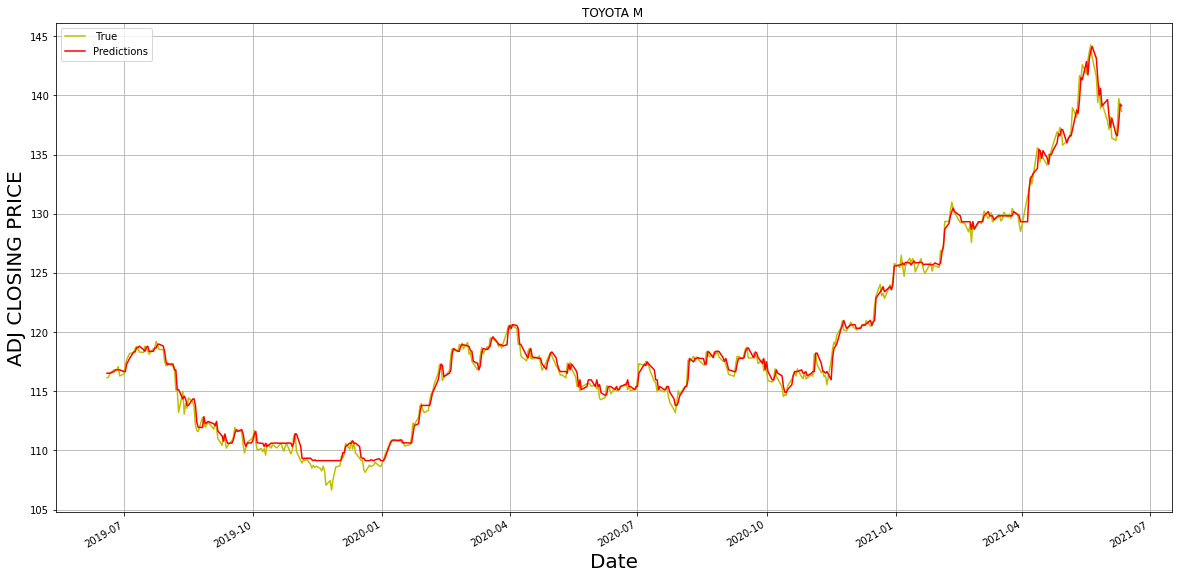

In [15]:
scaler_final=StandardScaler()
data_test_scaled=scaler_final.fit_transform(np.array(data_test['Adj Close']).reshape(-1,1))
x_test = []

for i in range(3, len(data_test_scaled)):
      x_test.append(data_train_scaled[i-3:i,0])
x_test = np.array(x_test)

y_true=[]
for i in range(3, len(data_test_scaled)):
  y_true.append(data_train_scaled[i,0])
y_true=np.array(y_true) 


y_predict=model.predict(x_test)
y_pr=scaler_final.inverse_transform(y_predict)
y_true=scaler_final.inverse_transform(y_true)
print("R2 SCORE IS")
print(r2_score(y_pr,y_true))
xv=data_test['Date']
outputdf=pd.DataFrame({'output': y_pr.reshape(-1), 'true_y': y_true.reshape(-1),'Date': xv[3:]})
p = outputdf.plot(x='Date', y='true_y', style='y-', grid=True,title="TOYOTA M ")
p = outputdf.plot(x='Date', y='output', style='r-', grid=True, ax=p)
p.legend([ ' True', 'Predictions'])
p.set_xlabel("Date",fontsize=20)
p.set_ylabel("ADJ CLOSING PRICE",fontsize=20)